# INFO 2950 - Project Phase V
---

By: David Fleurantin (djf252) and Meredith Hu (mmh264)
</br>
GitHub: https://github.com/DavidFleurantin/INFO-2950-Final-Project
</br>
Google Drive Link: https://drive.google.com/drive/folders/1iBHVGOBGvDMe7iT7gU4-bCawfUNaYZwe?usp=sharing

In [1]:
# load libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from IPython.display import Image
from IPython.core.display import HTML 
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
Image(url= "https://cdn.shopify.com/s/files/1/0072/7315/2579/articles/wallstreet_blog_grande.jpg?v=1598894414")

## Introduction 

---

A short squeeze of the stock price of GameStop (GME), an American video game retailer, occurred during January 2021. Approximately 140 percent of GameStop's public float had been sold short, and the rush to buy shares to cover those positions as the price rose caused it to rise even farther. Major hedge funds and other large short sellers experienced large and swift financial losses as the price of GME spiraled out of control. The short squeeze was initially catalyzed by members of the the Reddit subreddit [r/wallstreetbets](https://www.reddit.com/r/wallstreetbets/). On January 28th, the short squeeze caused GameStop's stock price to reach a value of oven opening value of US \\$500 per share, nearly 30 times the \\$17.25 valuation at the beginning of the month. Many people have urged regulators to investigate r/wallstreetbets for stock manipulation while also suggesting that the subreddit be removed on reddit for promoting hate speech. 

The purpose of our project is to assist regulators and moderators as they evaluate the overall post sentiment of r/wallstreetbets and determine if any action should be taken against the subreddit. To answer this question, we examined a subset of GameStop related reddit posts that were made on the r/wallstreetbets during the height of the subreddit's activity from late January to early April. We trained a multivariate linear model that predicted the sentiment polarity of a r/wallstreetbetsreddit post, either positive or negative, using the following features: the number of upvotes that the post received, the number of comments that the post received, the character count of the post's body text, the period during the day the post was authored - morning/afternoon/evening/night. Ultimately, we found our linear model to not be accurate in predicting r/wallstreetbets post title sentiment. We do not recommend our model to regulators or moderators looking to take sweeping action. 

---
## Data Description

**1. For what purpose was the dataset created? Was there a specific task in mind? Was there a specific gap that needed to be filled?**
   - Reddit data - was created to capture the sentiments of r/wallstreetbets in their posts during the meteoric rise of GME stock. WallStreetBets (r/wallstreetbets, also known as WSB), is a subreddit where participants discuss stock and option trading. It has become notorious for its profane nature and allegations of its users manipulating securities. Recently the community became mainstream again with its interest on GameStop shares.
    
**2. Who created the dataset and on behalf of which entity?**
   - Reddit - Data Scientist and Kaggle contributor, [Gabriel Preda](https://www.kaggle.com/gpreda), to satisfy a research need 

**3. What do the instances that comprise the dataset represent?**
   - Reddit - the data contains the 'title', 'score', 'url', 'number of comments', 'time of creation', 'post body', 'timestamp', and associated 'post id'. All of these instances serve to identify exactly 1 r/wallstreetbets post by a user at a particular time.

**4. How many instances are there in total?**
   - Reddit - There are 42552 total posts captured

**5. How was the data associated with each instance acquired? Was the data directly observable, reported by subjects, or indirectly inferred/derived from other data? If data was reported by subjects or indirectly inferred/derived from other data, was the data validated/verified?**
   - Reddit - the data was downloaded from https://www.reddit.com/r/wallstreetbets/ using `praw` (The Python Reddit API Wrapper) by the dataset's creator.
 
**6. Does the dataset contain all possible instances or is it a sample of instances from a larger set? If the dataset is a sample, then what is the larger set? Is the sample representative of the larger set?**
   - Reddit - the dataset is any actively growing sample of all r/wallstreetbets posts from Jan. 28, 2021 to present. Around Jan. 28, r/wallstreetbets was at its peak in media attention and coincided with the peak of GME stock. The sample may not be representative of the larger set since post topics on Reddit are not static (i.e. what users post today may not mirror the topics that they will post about tomorrow).
    
**7. Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances?**
   - Reddit - From January 28, 2021 to present (March 19, 2021)
   
**8. What data does each instance consist of? “Raw” data or features? In either case, please provide a description.**
   - Reddit - Raw user post data

**9. Is any information missing from individual instances? If so, please provide a description, explaining why this information is missing.**
   - Reddit - some values in the 'body' column were NaN. This was done by the creator of the data set to indicate that the post had no post body.

**10. Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?**
   - Reddit - the data contains a copious amount of harsh language/emojis, which is used in a joking fashion, inside post titles and post bodies. The posts were not filtered in order to preserve the nature of r/wallstreetbets.
    
**11. Does the dataset relate to people? If not, you may skip the remaining questions in this section.**
   - Reddit - the data captures direct postings by Reddit (a public social media platform) users.

**12. Is it possible to identify individuals, either directly or indirectly from the dataset?**
   - Reddit - it is not possible to identify users by their posts unless they choose to identify themselves in their post (self-doxing). The usernames of each user are not provided in the dataset. However, the url of each post is identified and can be used to find the respective post on Reddit.


**14. Were the individuals in question notified about the data collection? Did the individuals in question consent to the collection and use of their data?**
   - Reddit - No, the individuals were not notified about the data collection. However, Reddit is a public platform where all posts are publicly visible, so they did consent to the use of their data. As an interesting addendum, though, when r/wallstreetbets received increased media attention and its posts were documented by the media, users of the subreddit were either filled with pride/bravado or anger due to perceived misrepresentation of their posts. At points even CNBC (financial news) read r/wallstreetbets posts during TV broadcasts.

**15. Was any preprocessing/cleaning/labeling of the data done?.**
   - Reddit - The 'created', 'url', and 'id' columns were useless to our planned analysis, so we removed them. Reddit gives users the option to provide a body to whatever topic that they post. The 'body' text was not much of particular interest to us. However, we felt that it was necessary to capture the length of each post body in case it was useful in analysis. We did this by deciding that a post that was 1000 characters long would have a 'body' value of 1000, while a post with no body (NaN) would have a 'body' value of 0. The timestamp column was converted into a datetime object from a string in order to enable easier comparisons.
    
**16. Is the software used to preprocess/clean/label the instances available? If so, please provide a link or other access point.**
   - Reddit - the dataset creator utilized [praw](https://praw.readthedocs.io/en/latest/) to scrape r/wallstreetbets post

**17. Where can your raw source data be found, if applicable? Provide a link to the raw data.**
   - The dataset can be found here (Make sure to use a Cornell account to view) -> https://drive.google.com/drive/folders/1afEt08iEISR9dxVcrv-lBQych2ZslX0d?usp=sharing


## Data Import
---

Data Cleaning and Curation steps have been excluded. Please refer to Data Appendix Folder for for more details. 
</br>
Datasets can be found here: https://drive.google.com/drive/folders/1iBHVGOBGvDMe7iT7gU4-bCawfUNaYZwe?usp=sharing

#### r/wallstreetbets Posts and Metadata

In [2]:
## load Reddit (WSB) data
reddit_data = pd.read_csv("reddit_wsb_gme.csv")
reddit_data = reddit_data.reset_index(drop=True)
reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp'], format = '%Y-%m-%d %H:%M:%S')
reddit_data.head()

,title,score,comms_num,body,timestamp,body_len
0,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,0.0
1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,0.0
2,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,0.0
3,Currently Holding AMC and NOK - Is it retarded...,200,161,NaN,2021-01-28 21:19:16,0.0
4,GME Premarket 🍁 Musk approved 🎮🛑💎✋,562,97,NaN,2021-01-28 21:17:28,0.0


In [3]:
reddit_data.describe()

,score,comms_num,body_len
count,8809.000000,8809.000000,8809.000000
mean,1819.785787,343.753548,526.592349
std,9491.172973,3693.024629,1501.850955
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000
50%,37.000000,15.000000,0.000000
75%,248.000000,62.000000,323.000000
max,225870.000000,93268.000000,34984.000000


---
## Preregistration Statement

We aim to provide an answer to the following question through data analysis and evaluation of statistically significant results. 

#### Using a variety of reddit post features—post upvote score, number of comments, post body length, and time of day published (morning, afternoon, evening, night)— can we accurately predict the sentiment polarity of the post, either positive or negative?

---
## Data Analysis

In order to answer this question, we must develop a methodology for scoring each post based upon its sentiment value. After much consideration we discovered a python library named `sentifish`. sentifish is a Python library for Sentiment analysis of textual data(only English).By using sentifish it is very easy to perform tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification etc. For more information please refer to the following reference page [here](https://pypi.org/project/sentifish/)

Let's download `sentifish` and import the `Sentiment` package.

In [4]:
!{sys.executable} -m pip install sentifish
from sentifish import Sentiment

The `Sentiment` package will be used in the following way. Sentiment( ) is a class. By using this class we can find the sentiment of a texual data(it may be a word, sentence or a paragraph). This class has a constructor init(self,text) which takes the text data at the time of instantiation of Sentiment( ). 

Class Sentiment( ) has a method analyze( ) it returns a float number in between -1 to +1. +1 for strongly positive sentiment, 0 for neutral and -1 for strongly negative sentiment.

In [5]:
negative_text = "I hate you"
positive_text = "I love you"

A Negative Comment...

In [6]:
obj=Sentiment(negative_text)
print("Sentiment Polarity = {:.3f}".format(obj.analyze( )))

Sentiment Polarity = -0.800


A Positive Comment...

In [7]:
obj=Sentiment(positive_text)
print("Sentiment Polarity = {:.3f}".format(obj.analyze( )))

Sentiment Polarity = 0.500


Let's try using it with text data from our reddit dataset.

In [8]:
post = reddit_data['body'][98]
post

'TLDR; **HOLD GME, leave feedback to the developers of Robinhood to show how much of a disagreement there is in our representation on the app.**\n\n&#x200B;\n\nIt is shocking to see how much the community can impact the lives around us in such a positive way, but it is hard to see that Robinhood has fucked us with the current gamma squeeze this friday. However, it is optimal for us to remember that next week is the week for this squeeze as mentions by u/wildthangy.\n\n&#x200B;\n\nSo what is the plan? By no means is this financial advice or market manipulation, as said in the r/WALLSTREETBETS **RULES,** but to allow robinhood to take away our tendies and gains is absurd. REVIEW THEIR APP AND LET THEM KNOW IMMEDIATE FEEDBACK.\n\n&#x200B;\n\n🚀HOLD GME, AMC, AND BB 🚀'

In [9]:
obj=Sentiment(post)
print("Sentiment Polarity = {:.3f}".format(obj.analyze( )))

Sentiment Polarity = 0.077


The sentiment of the post above is slightly positive almost neutral according to to the sentiment analyzer method. This makes sense. The poster uses sharp language to describe their distaste of Robinhood. However, this appears to be balanced out by the poster's positive praise of the WSB subreddit.

A point of possible contention arises with posts that feature no post body. Reddit allows users to post topics without writing a post body by design. Below is an example of a post with no body, which is indicated as `NaN` and body length of `0`

In [10]:
reddit_data.head(1)

,title,score,comms_num,body,timestamp,body_len
0,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,0.0


In [11]:
count = reddit_data[reddit_data.body_len == 0].shape[0]
print("Number of posts without body is {}!".format(count))
print("Percentage of posts without body is {:.2f}%!".format(count/reddit_data.shape[0]))

Number of posts without body is 4491!
Percentage of posts without body is 0.51%!


As illustrated above, a little over half of the posts in the dataset have no post body at all. To control for this, **we will only be considering the post title**.

In [12]:
reddit_data.head()

,title,score,comms_num,body,timestamp,body_len
0,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,0.0
1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,0.0
2,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,0.0
3,Currently Holding AMC and NOK - Is it retarded...,200,161,NaN,2021-01-28 21:19:16,0.0
4,GME Premarket 🍁 Musk approved 🎮🛑💎✋,562,97,NaN,2021-01-28 21:17:28,0.0


Another consideration is **prevalence of emojis**. Emojis might skew the sentiment polarity score given that we don't know how `sentifish` calculates it. Therefore the function below was written to address this.

In [13]:
def deEmojify(text):
    return text.encode('ascii', 'ignore').decode('ascii')

Now we can write a function to characterize the `sentiment_score` for each post based on its body text.

In [14]:
def post_sentiment(row):
    
    try: 
        title_text = deEmojify(row['title'])
        obj=Sentiment(title_text)
        polarity = obj.analyze( )

        return (polarity)
    
    except:
        return 0

Let's now apply this function on the entire dataset.

In [15]:
reddit_data['sentiment_score'] = reddit_data.apply(post_sentiment, axis=1)

In [16]:
reddit_data.head()

,title,score,comms_num,body,timestamp,body_len,sentiment_score
0,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,0.0,0.000
1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,0.0,-0.277
2,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,0.0,0.000
3,Currently Holding AMC and NOK - Is it retarded...,200,161,NaN,2021-01-28 21:19:16,0.0,-0.800
4,GME Premarket 🍁 Musk approved 🎮🛑💎✋,562,97,NaN,2021-01-28 21:17:28,0.0,0.000


Now we can characterize each posted based on its sentiment polarity (`positive`, `neutral`, `negative`).

In [17]:
def sentiment_polarity(row):
    if row['sentiment_score'] > 0:
        return 'Positive'
    elif row['sentiment_score'] < 0:
        return 'Negative'
    else: 
        return 'Neutral'

Applying the function to the entire dataset we get...

In [18]:
reddit_data['sentiment_polarity'] = reddit_data.apply(sentiment_polarity, axis=1)

In [19]:
reddit_data.head()

,title,score,comms_num,body,timestamp,body_len,sentiment_score,sentiment_polarity
0,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,0.0,0.000,Neutral
1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,0.0,-0.277,Negative
2,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,0.0,0.000,Neutral
3,Currently Holding AMC and NOK - Is it retarded...,200,161,NaN,2021-01-28 21:19:16,0.0,-0.800,Negative
4,GME Premarket 🍁 Musk approved 🎮🛑💎✋,562,97,NaN,2021-01-28 21:17:28,0.0,0.000,Neutral


Below is the the distribution of postive, neutral, and negative posts.

In [20]:
reddit_data['sentiment_polarity'].value_counts()

Neutral     5021
Positive    2492
Negative    1296
Name: sentiment_polarity, dtype: int64

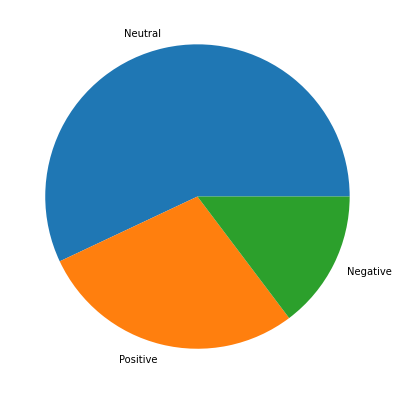

In [21]:

pols = ['Neutral', 'Positive', 'Negative']
data = [reddit_data['sentiment_polarity'].value_counts()[0], reddit_data['sentiment_polarity'].value_counts()[1], reddit_data['sentiment_polarity'].value_counts()[2]]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = pols)
  
# show plot
plt.show()

Let's continue by only focusing on `positive` and `negative` posts as they should provide us with the most insight.

In [22]:
reddit_data = reddit_data[reddit_data.sentiment_polarity != 'Neutral']

In [23]:
reddit_data['sentiment_polarity'].value_counts()

Positive    2492
Negative    1296
Name: sentiment_polarity, dtype: int64

In [24]:
most_pos = reddit_data.loc[reddit_data['sentiment_score'].idxmax()]['title']
most_neg = reddit_data.loc[reddit_data['sentiment_score'].idxmin()]['title']

Below is the most positive post according to our sentiment methodology.

In [25]:
most_pos

'I got in on GME 74 @ $290. Best of luck bois and gurls'

Similarly here is the most negative post.

In [26]:
most_neg

'GME, my worst-case scenario nonsense'

**Now that we have a baseline for each post polarity, lets train a multivariate linear model to predict sentiment polarity using the features of our dataset: post upvote score, number of comments, post body length, and time of day published (morning, afternoon, evening, night)** Let's see how accurate our model can be.

First, if we wish to utilize the `timestamp` of each post in our proposed model, we must translate the data into something that can be easily parsed.

Let's create a new column called `day_period` that will classify each timestamp as either occurring during the morning, afternoon, evening or night. The following division of the day will be used as defined [here](https://learnersdictionary.com/qa/parts-of-the-day-early-morning-late-morning-etc):

- Morning : 5 am to 12 pm (noon)                 
- Afternoon : 12 pm to 5 pm      (5:00 to 17:00) 
- Evening : 5 pm to 9 pm         (17:00 to 21:00)
- Night : 9 pm to 4 am           (21:00 to 4:00)

The following function will be used to determine the period of the day using the `datetime hour attribute`.

In [27]:
def get_day_period(row):
    hr = row['timestamp'].hour
    if hr >= 5 and hr < 12: 
        return "morning"
    if hr >= 12 and hr < 17: 
        return "afternoon"
    if hr >= 17 and hr < 21: 
        return "evening"
    else:
        return "night"

In [28]:
reddit_data['day_period'] = reddit_data.apply(get_day_period, axis=1)
reddit_data.head()

,title,score,comms_num,body,timestamp,body_len,sentiment_score,sentiment_polarity,day_period
1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,0.0,-0.277000,Negative,night
3,Currently Holding AMC and NOK - Is it retarded...,200,161,NaN,2021-01-28 21:19:16,0.0,-0.800000,Negative,night
10,Really? I can’t even buy GME or AMC for now? 😤,606,376,NaN,2021-01-28 20:47:20,0.0,0.375000,Positive,evening
14,I don’t have as much as the rest of you guys b...,365,60,NaN,2021-01-28 20:30:20,0.0,0.033333,Positive,evening
16,GME Gang - 34 Consecutive Days on NYSE Thresho...,207,51,NaN,2021-01-28 20:02:44,0.0,-0.375000,Negative,evening


In [29]:
reddit_data['day_period'].value_counts()

night        2266
morning       831
afternoon     468
evening       223
Name: day_period, dtype: int64

In [30]:
count = reddit_data[reddit_data.day_period == 'night'].shape[0]
print("Number of posts at night {}!".format(count))
print("Percentage of posts at night {:.2f}%!".format(count/reddit_data.shape[0]))

Number of posts at night 2266!
Percentage of posts at night 0.60%!


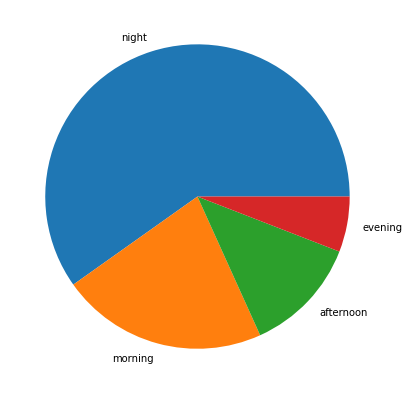

In [31]:

pols = ['night', 'morning', 'afternoon', 'evening']
data = [reddit_data['day_period'].value_counts()[0], reddit_data['day_period'].value_counts()[1], reddit_data['day_period'].value_counts()[2], reddit_data['day_period'].value_counts()[3] ]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = pols)
  
# show plot
plt.show()

It seems like a lot of the posts were posted during the night! This makes sense since not a lot of people are allowed to post, let alone browse reddit, during the day due to school or work obligations.

In [32]:
reddit_data.head()

,title,score,comms_num,body,timestamp,body_len,sentiment_score,sentiment_polarity,day_period
1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,0.0,-0.277000,Negative,night
3,Currently Holding AMC and NOK - Is it retarded...,200,161,NaN,2021-01-28 21:19:16,0.0,-0.800000,Negative,night
10,Really? I can’t even buy GME or AMC for now? 😤,606,376,NaN,2021-01-28 20:47:20,0.0,0.375000,Positive,evening
14,I don’t have as much as the rest of you guys b...,365,60,NaN,2021-01-28 20:30:20,0.0,0.033333,Positive,evening
16,GME Gang - 34 Consecutive Days on NYSE Thresho...,207,51,NaN,2021-01-28 20:02:44,0.0,-0.375000,Negative,evening


The following features of the reddit dataset are ready to be used in a multivariate model to predict the `sentiment_polarity` of a reddit post: `score` (the number of upvotes that the post received), `comms_num` (the number of comments that the post received), `body length` (the character count of the post's body text) and `day_period` (the period during the day the post was authored - morning/afternoon/evening/night).

We felt that these features would be most representative of the attributes that define a Reddit post.

Before we can begin we must address the presence of categorical data in the day_period column in our dataset. 

We can resolve this issue by creating an `indicator variable`. An indicator variable simply indicates whether or not an observation is in a category of `night`, `evening`, `afternoon`, or `morning`.

In [33]:
dummy = pd.get_dummies(reddit_data['day_period'])
dummy.value_counts()

afternoon  evening  morning  night
0          0        0        1        2266
                    1        0         831
1          0        0        0         468
0          1        0        0         223
dtype: int64

In [34]:
reddit_data = pd.concat([reddit_data, dummy], axis=1)

In [35]:
reddit_data.head()

,title,score,comms_num,body,timestamp,body_len,sentiment_score,sentiment_polarity,day_period,afternoon,evening,morning,night
1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,0.0,-0.277000,Negative,night,0,0,0,1
3,Currently Holding AMC and NOK - Is it retarded...,200,161,NaN,2021-01-28 21:19:16,0.0,-0.800000,Negative,night,0,0,0,1
10,Really? I can’t even buy GME or AMC for now? 😤,606,376,NaN,2021-01-28 20:47:20,0.0,0.375000,Positive,evening,0,1,0,0
14,I don’t have as much as the rest of you guys b...,365,60,NaN,2021-01-28 20:30:20,0.0,0.033333,Positive,evening,0,1,0,0
16,GME Gang - 34 Consecutive Days on NYSE Thresho...,207,51,NaN,2021-01-28 20:02:44,0.0,-0.375000,Negative,evening,0,1,0,0


Let's now Split the reddit data into a training and test set using the `train_test_split()` function. A `random_state` value of 10 will be used to ensure uniformity.


In [36]:
# train-test split (80%/20%)
reddit_data_train, reddit_data_test = train_test_split(reddit_data[['score', 'comms_num', 'body_len', 'afternoon', 'evening', 'morning', 'night', 'sentiment_score', 'sentiment_polarity']], test_size= 0.2, random_state = 10)

print(" Reddit Training Set\n")
print(reddit_data_train.head())
print("Training set has {} observations\n".format(len(reddit_data_train)))

print("Reddit Test Set\n")
print(reddit_data_test.head())
print("Test set has {} observations\n".format(len(reddit_data_test)))


 Reddit Training Set

      score  comms_num  body_len  afternoon  evening  morning  night  \
4577    296         14       0.0          0        0        1      0   
6596     81         13       0.0          0        0        1      0   
8784    175         46    2371.0          1        0        0      0   
3129    373         35       0.0          0        0        1      0   
3339      1          1       0.0          0        0        0      1   

      sentiment_score sentiment_polarity  
4577         0.433000           Positive  
6596         0.416500           Positive  
8784         0.800000           Positive  
3129        -0.290333           Negative  
3339         0.156250           Positive  
Training set has 3030 observations

Reddit Test Set

      score  comms_num  body_len  afternoon  evening  morning  night  \
502       1          1       0.0          0        0        0      1   
8445      7          8       0.0          0        0        1      0   
321       4       

In [37]:
##create a linear regression object
linear_model = LinearRegression() 
multi_features = ['score', 'comms_num', 'body_len', 'afternoon', 'evening', 'morning', 'night']
X = reddit_data_train[ multi_features ]
linear_model.fit(X, reddit_data_train['sentiment_score']) 

LinearRegression()

Now let's use the model to predict the `sentiment_score` in the test set.  

In [38]:
y_pred = linear_model.predict(reddit_data_test[multi_features])

In [39]:
y_pred_polarity = []
for i in range (0, len(y_pred)):
    if y_pred[i] > 0:
        y_pred_polarity.append('Positive')
    else:
        y_pred_polarity.append('Negative')

Let's now compute the accuracy of the linear model on the test dataset.

In [40]:
y_true = reddit_data_test['sentiment_polarity']
y_true = y_true.reset_index(drop=True)

correct = 0
for i in range(0, len(y_true)):
    if y_pred_polarity[i] == y_true[i]:
        correct += 1
    
accuracy = correct/len(reddit_data_train)

print("Prediction Accuracy: {:.1f}%".format(accuracy *100))

Prediction Accuracy: 16.3%


Now let's look at the training set's accuracy.

In [41]:
y_true = reddit_data_train['sentiment_polarity']
y_true = y_true.reset_index(drop=True)

y_pred = linear_model.predict(reddit_data_train[multi_features])

y_pred_polarity = []
for i in range (0, len(y_pred)):
    if y_pred[i] > 0:
        y_pred_polarity.append('Positive')
    else:
        y_pred_polarity.append('Negative')

correct = 0
for i in range(0, len(y_true)):
    if y_pred_polarity[i] == y_true[i]:
        correct += 1
    
accuracy = correct/len(reddit_data_train)

print("Prediction Accuracy: {:.1f}%".format(accuracy *100))

Prediction Accuracy: 65.9%


In [42]:
r_2 = linear_model.score(X, reddit_data_train['sentiment_score'])
slope = linear_model.coef_[0]
print("Regression Slope = {} - R^2 = {}".format(slope, r_2))

Regression Slope = 5.166337461855809e-07 - R^2 = 0.004114846573968434


Reddit post sentiment appears to not be correlated at all with the given feature list that we selected: `sentiment_polarity`, `score` , `comms_num`, `body length`, and `day_period`.

As you increase by one reddit post, you can expect `sentifish` sentiment polarity to increase by almost a negligible amount. The $r^2$ score is 0.004 and it shows that our model doesn’t fit the data very well because it cannot explain all the variance. 

Upon closer inspection, our model is predicting that almost every post will be positive!

In [43]:
pos_count = 0 
neg_count = 0

for i in range(0, len(y_pred)):
    if y_pred[i] > 0:
        pos_count += 1
    else:
        neg_count += 1
        print("Negative Post index: {}".format(i))

print("Number of Positive Posts {}, Number of Negative Posts {}".format(pos_count, neg_count))

Negative Post index: 1282
Number of Positive Posts 3029, Number of Negative Posts 1


Let's take a look at single negative post that was predicted which was indeed Positive.

In [44]:
y_true[1282]

'Positive'

Our model does not appear to be successful.

### Evaluation of Significance

Let's investigate whether or not this relationship is by pure random chance or is statistically significant in some form.

In [45]:
def permuted_y(): 
    return np.random.permutation(reddit_data['sentiment_score'].copy())

multi_features = ['score', 'comms_num', 'body_len', 'afternoon', 'evening', 'morning', 'night']
array_coef = np.zeros((1000,7))
for i in range(1000):
    model = LinearRegression().fit(reddit_data[multi_features], permuted_y())
    array_coef[i, :] = model.coef_

Score:


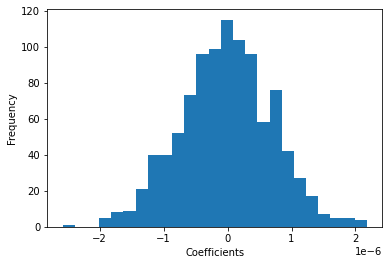

Comment Number:


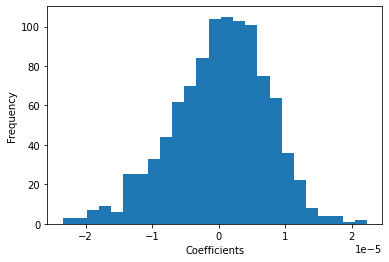

Post Body Length:


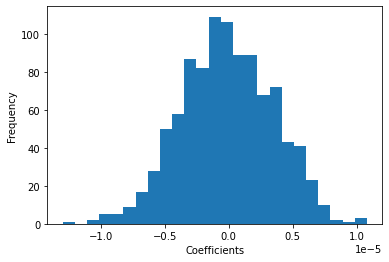

Afternoon:


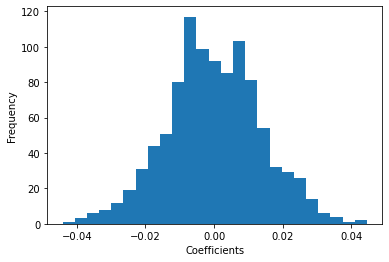

Evening:


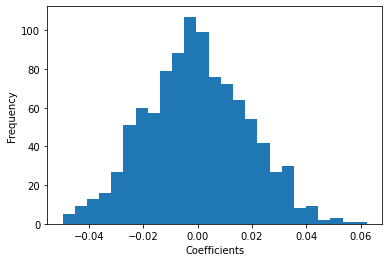

Morning:


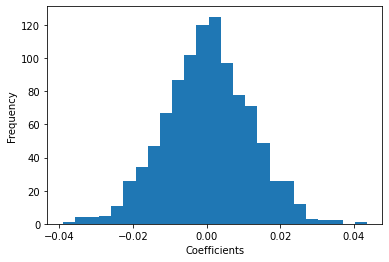

Night:


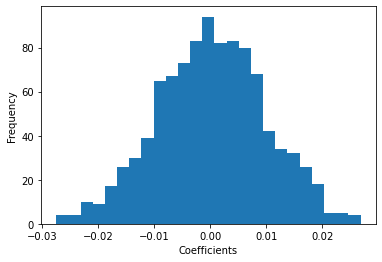

In [46]:
print("Score:")
plt.hist(array_coef[:, 0], bins=25)
plt.xlabel("Coefficients")
plt.ylabel("Frequency")
plt.show()

print("Comment Number:")
plt.hist(array_coef[:, 1], bins=25)
plt.xlabel("Coefficients")
plt.ylabel("Frequency")
plt.show()

print("Post Body Length:")
plt.hist(array_coef[:, 2], bins=25)
plt.xlabel("Coefficients")
plt.ylabel("Frequency")
plt.show()

print("Afternoon:")
plt.hist(array_coef[:, 3], bins=25)
plt.xlabel("Coefficients")
plt.ylabel("Frequency")
plt.show()

print("Evening:")
plt.hist(array_coef[:, 4], bins=25)
plt.xlabel("Coefficients")
plt.ylabel("Frequency")
plt.show()

print("Morning:")
plt.hist(array_coef[:, 5], bins=25)
plt.xlabel("Coefficients")
plt.ylabel("Frequency")
plt.show()

print("Night:")
plt.hist(array_coef[:, 6], bins=25)
plt.xlabel("Coefficients")
plt.ylabel("Frequency")
plt.show()

The permuted-y test proves that the regression data was not generated by randim chance.

---
## Interpretation and Project Conclusions

During the time period of our analysis, there were some calls for law makers to examine the role of r/wallstreetbets in influencing to stock market. Some people called for the subreddit to be removed on the grounds of it being used for criminal market manipulation. Others called for the subreddit to be removed on the grounds that it was promoting hate speech. The data analysis in our project analyzes the latter concern. We trained a multivariate linear model that predicted the sentiment polarity of a r/wallstreetbets reddit post, either positive or negative, using the following features: the number of upvotes that the post received, the number of comments that the post received, the character count of the post's body text, the period during the day the post was authored - morning/afternoon/evening/night.

However, our analysis showed that our model proved to failed in characterizing the sentiment polarity r/wallstreetbets posts based on title. This was our expectation before we conducted our analysis given the reddit dataset. Although unsuccessful and not statistically significant in any way, our model surprisingly predicted all the reddit posts to be of positive sentiment. It seems that r/wallstreetbets functioned more like a 'town square' where users shared their sentiment about stocks, which is no different than Twitter, Facebook, or simple word of mouth. We do not recommend our model to regulators or moderators looking to take sweeping action. 

---
## Project Limitations

**Reddit Dataset** - r/wallstreetbets post dataset is primarily limited by the time span in which the data was captured. The posts were recorded starting from Jan 28, 2021. This is one day after the peak stock price of GME on Jan. 27, 2021. It would have been nice to have data capturing posts before Jan 28, 2021 as we could better document user sentiment before GME's rise and its peak. The posts contain information not related to GameStop. This means we would have to find a way to filter relevant posts. We also converted the 'body' column to only record numerical character length instead of the actual body message. 

**Sentifish** - We opted to use an outside resource in order to conduct the the sentiment analysis for each reddit post. We also do not know how precisely the sentiment was calculated according to the library. The method of sentiment analysis chosen is bounded to produce different results in our project. In the future, we hope to learn to implement such analysis ourselves. Moreover, since not every post had body text, we instead opted to consider only the post's title. We sacrificed potentially more detail in exchange for uniformity.

**r/wallstreetbets Moderation** - [the subreddit](https://www.reddit.com/r/wallstreetbets/) appears to have very strict moderation and this is reflected in the limited amount of posts in the 'new' section. Many posts appear to be deleted by moderator if they do not meet a certain standard of quality.

**GameStop/GME Reddit Post Search** - the boolean search method used to subset the reddit post data set (see Data Cleaning Appendix) would be prone to filter posts out that are indeed relevant to GameStop.

---
## Source Code


GitHub: https://github.com/DavidFleurantin/INFO-2950-Final-Project
</br>
Google Drive Link: https://drive.google.com/drive/folders/1iBHVGOBGvDMe7iT7gU4-bCawfUNaYZwe?usp=sharing

---
## Acknowledgments

Special thanks is given to the following resources:

1. [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts) - For providing an excellent resource for finding a dataset that formed a basis of our project
2. [Sentifish](https://pypi.org/project/sentifish/) - For making sentiment analysis easier
3. Stack Overflow
    * [Dataframe Boolean Search](https://stackoverflow.com/questions/22909082/pandas-converting-string-object-to-lower-case-and-checking-for-string)
    * [Embed Images](https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o)
    * [Combine Dataframes](https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes)
    * [Regression with NaN values](https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy)
    * [Lambda Expressions](https://stackoverflow.com/questions/51787247/pandas-update-column-values-from-another-column-if-criteria)
    * [Apply Function](https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column)
    * [Datetime Object Floor Function](https://stackoverflow.com/questions/32723150/rounding-up-to-nearest-30-minutes-in-python)
    * [Convert Series to Dict](https://stackoverflow.com/questions/29403192/convert-series-returned-by-pandas-series-value-counts-to-a-dictionary)
    * [Datetime Hour Attribute](https://stackoverflow.com/questions/21674782/how-to-check-if-a-date-time-is-before-midday)
    * [Dummy Variables](https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40)

4. TAs/Office Hours - Our **TA Elena** for helping us troubleshoot our problems along the way